In [2]:
import os
from pathlib import Path
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy import integrate
base = Path("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data")


for f in base.glob("*npy"):
    print(f.absolute())


ndvi = np.load("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\\ndvi.npy")
scl = np.load("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\scl.npy")
time = np.load("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\\time.npy")


D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\ndvi.npy
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\scl.npy
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session8\data\time.npy


In [3]:
ndvi.shape

(142,)

In [4]:
np.unique(scl)

array([ 3,  4,  7,  8,  9, 11], dtype=int8)

In [6]:
time

array(['2018-01-02T10:24:21.000000000', '2018-01-04T10:14:09.000000000',
       '2018-01-07T10:23:59.000000000', '2018-01-09T10:14:01.000000000',
       '2018-01-12T10:24:01.000000000', '2018-01-14T10:13:49.000000000',
       '2018-01-17T10:23:39.000000000', '2018-01-19T10:13:31.000000000',
       '2018-01-22T10:23:21.000000000', '2018-01-27T10:22:59.000000000',
       '2018-01-29T10:12:51.000000000', '2018-02-01T10:22:41.000000000',
       '2018-02-03T10:12:19.000000000', '2018-02-06T10:22:09.000000000',
       '2018-02-08T10:11:51.000000000', '2018-02-11T10:21:41.000000000',
       '2018-02-13T10:11:19.000000000', '2018-02-16T10:20:59.000000000',
       '2018-02-18T10:10:51.000000000', '2018-02-21T10:20:31.000000000',
       '2018-02-23T10:10:19.000000000', '2018-02-26T10:20:19.000000000',
       '2018-02-28T10:10:21.000000000', '2018-03-03T10:20:21.000000000',
       '2018-03-05T10:10:19.000000000', '2018-03-10T10:10:21.000000000',
       '2018-03-13T10:20:21.000000000', '2018-03-15

In [9]:
doy = pd.Series(time).dt.dayofyear.values

In [11]:
doy

array([  2,   4,   7,   9,  12,  14,  17,  19,  22,  27,  29,  32,  34,
        37,  39,  42,  44,  47,  49,  52,  54,  57,  59,  62,  64,  69,
        72,  74,  77,  79,  82,  84,  87,  89,  92,  94,  97,  99, 102,
       104, 107, 109, 112, 114, 117, 119, 122, 124, 127, 129, 132, 134,
       137, 139, 142, 144, 149, 152, 154, 157, 159, 162, 164, 167, 169,
       172, 174, 177, 179, 182, 184, 187, 189, 192, 194, 197, 199, 202,
       204, 207, 209, 212, 214, 217, 219, 222, 224, 227, 229, 232, 234,
       237, 239, 242, 244, 247, 249, 252, 254, 257, 259, 262, 264, 267,
       269, 272, 274, 277, 279, 282, 284, 287, 289, 292, 294, 297, 299,
       302, 304, 307, 309, 312, 314, 319, 322, 324, 327, 329, 332, 334,
       337, 339, 342, 344, 347, 349, 352, 354, 357, 359, 362, 364],
      dtype=int64)

In [13]:
def scl_to_mask(scl):
    return ((scl > 3) & (scl < 8) | (scl > 9))

In [15]:
scl

array([11,  8,  9, 11,  8,  7,  9,  8,  8, 11, 11,  9,  9,  8,  9,  9, 11,
        9,  9,  9,  7,  9,  8, 11,  9,  9,  9,  8,  9,  9,  9, 11,  9,  9,
        7,  9, 11,  9,  8,  9,  9,  8,  7,  4,  4,  4,  8,  8,  7,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  9,  9,  8,  4,  9,  9,  4,  9,
        8,  9,  8,  8,  9,  4,  4,  4,  9,  9,  9,  9,  8,  4,  8,  9,  9,
        9,  3,  7,  4,  9,  8,  9,  4,  9,  9,  9,  9,  4,  8,  8,  4,  9,
        4,  4,  4,  9,  8,  4,  9,  4,  4,  4,  4,  4,  9,  9,  4,  8,  9,
        7,  9,  8,  4,  4,  4,  4,  8,  9, 11,  9,  9, 11, 11,  9, 11, 11,
       11, 11,  8, 11, 11,  9], dtype=int8)

In [17]:
mask = scl_to_mask(scl)
mask

array([ True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,

<function matplotlib.pyplot.show(close=None, block=None)>

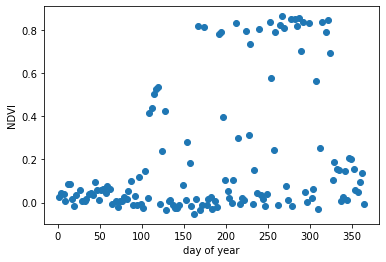

In [20]:
plt.figure()
plt.scatter(doy,ndvi)
plt.xlabel("day of year")
plt.ylabel("NDVI")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

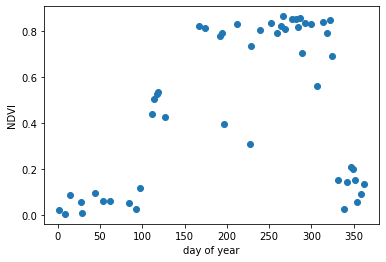

In [24]:
plt.figure()
plt.scatter(doy[mask],ndvi[mask])
plt.xlabel("day of year")
plt.ylabel("NDVI")

plt.show

In [30]:
doy_interp = np.arange(1,366)
ndvi_interp = np.interp(doy_interp, doy[mask], ndvi[mask])

In [31]:
doy_interp.shape

(365,)

In [32]:
ndvi_interp.shape

(365,)

<function matplotlib.pyplot.show(close=None, block=None)>

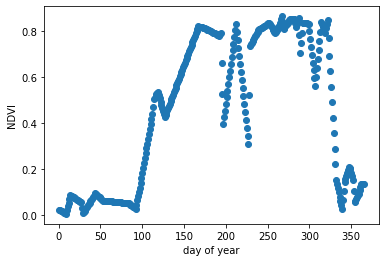

In [33]:
plt.figure()
plt.scatter(doy_interp,ndvi_interp)
plt.xlabel("day of year")
plt.ylabel("NDVI")

plt.show

In [35]:
help(savgol_filter)

Help on function savgol_filter in module scipy.signal._savitzky_golay:

savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
    Apply a Savitzky-Golay filter to an array.
    
    This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
    determines the axis along which the filter is applied.
    
    Parameters
    ----------
    x : array_like
        The data to be filtered. If `x` is not a single or double precision
        floating point array, it will be converted to type ``numpy.float64``
        before filtering.
    window_length : int
        The length of the filter window (i.e., the number of coefficients).
        `window_length` must be a positive odd integer. If `mode` is 'interp',
        `window_length` must be less than or equal to the size of `x`.
    polyorder : int
        The order of the polynomial used to fit the samples.
        `polyorder` must be less than `window_length`.
    deriv : int, optional
    

In [37]:
ndvi_long_term = savgol_filter(ndvi_interp, window_length= 81, polyorder = 2)

<function matplotlib.pyplot.show(close=None, block=None)>

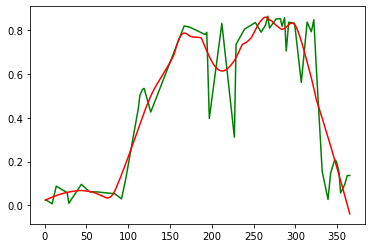

In [39]:
plt.figure()
plt.plot(doy_interp,ndvi_interp, c = "green")
plt.plot(doy_interp,ndvi_long_term, c = "red")


plt.show

In [67]:
ndvi_new = np.copy(ndvi_interp)

In [68]:
ndvi_new[ndvi_interp < ndvi_long_term] = ndvi_long_term[ndvi_interp < ndvi_long_term]

<function matplotlib.pyplot.show(close=None, block=None)>

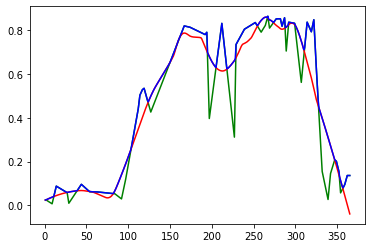

In [69]:
plt.figure()
plt.plot(doy_interp,ndvi_interp, c = "green")
plt.plot(doy_interp,ndvi_long_term, c = "red")
plt.plot(doy_interp,ndvi_new, c = "blue")


plt.show

In [74]:
for i in range (10):
    ndvi_out = savgol_filter(ndvi_new, window_length = 71, polyorder = 6)
    ndvi_new = np.copy(ndvi_interp)
    ndvi_new[ndvi_new < ndvi_out] = ndvi_out[ndvi_new < ndvi_out]
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

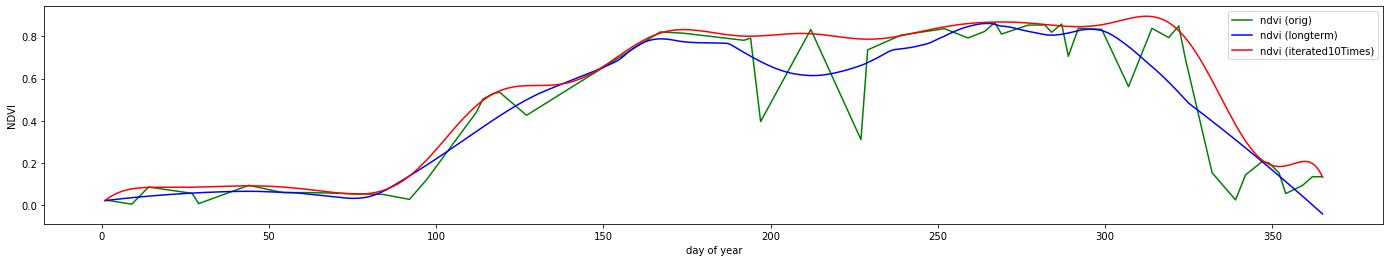

In [75]:
plt.figure(figsize=(24,4))
plt.plot(doy_interp,ndvi_interp, c = "green", label = "ndvi (orig)")
plt.plot(doy_interp,ndvi_long_term, c = "blue", label = "ndvi (longterm)")
plt.plot(doy_interp, ndvi_out, c = "red", label = "ndvi (iterated10Times)")
plt.xlabel("day of year")
plt.ylabel("NDVI")
plt.legend()

plt.show

In [78]:
def phenometrics(ndvi,doy):
    # peak of season time/nvi value
    t_of_max = doy[np.argmax(ndvi)]
    v_of_max = ndvi.max()
    
    # amplitude
    amp = ndvi.max() - ndvi.min()
    # threshold  20 of annual amplitude
    th_20 = ndvi.min() + amp * 0.2
    #start of season
    t_sos_20 = doy[np.where(ndvi >= th_20)[0].min()]
    #end of season
    t_eos_20 = doy[::-1][np.where(ndvi[::-1] >= th_20)[0].min()]
    #growing season length
    gsl_20 = t_eos_20 - t_sos_20
    return {
        "t_max": t_of_max,
        "v_max": v_of_max,
        "th_20": th_20,
        "t_sos_20": t_sos_20,
        "t_eos_20":t_eos_20,
        "gsl_20":gsl_20
    }
    

In [81]:
pm_20 = phenometrics(ndvi_out, doy_interp)

In [87]:
pm_20

{'t_max': 312,
 'v_max': 0.8951584247459158,
 'th_20': 0.19779355902923518,
 't_sos_20': 97,
 't_eos_20': 362,
 'gsl_20': 265}

In [88]:
phenometrics(ndvi_interp,doy_interp)

{'t_max': 267,
 'v_max': 0.8652751445770264,
 'th_20': 0.17819559127092363,
 't_sos_20': 100,
 't_eos_20': 350,
 'gsl_20': 250}

<function matplotlib.pyplot.show(close=None, block=None)>

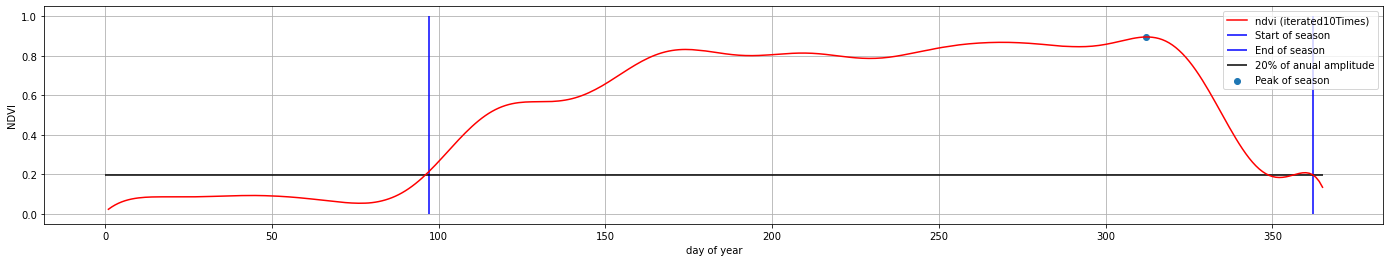

In [93]:
plt.figure(figsize=(24,4))
plt.plot(doy_interp, ndvi_out, c = "red", label = "ndvi (iterated10Times)")
#start and end of season
plt.vlines(pm_20["t_sos_20"], 0, 1, color = "blue", label = "Start of season")
plt.vlines(pm_20["t_eos_20"], 0, 1, color = "blue", label = "End of season")
plt.hlines(pm_20["th_20"], 0,365,color="black",label = "20% of anual amplitude")
plt.scatter(pm_20["t_max"],pm_20["v_max"], label="Peak of season")
plt.grid()
plt.xlabel("day of year")
plt.ylabel("NDVI")
plt.legend()

plt.show 